In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

In [4]:
modelo_genero = load_model('modelo_genero.keras')

1/1 [==============================] - 2s 2s/step


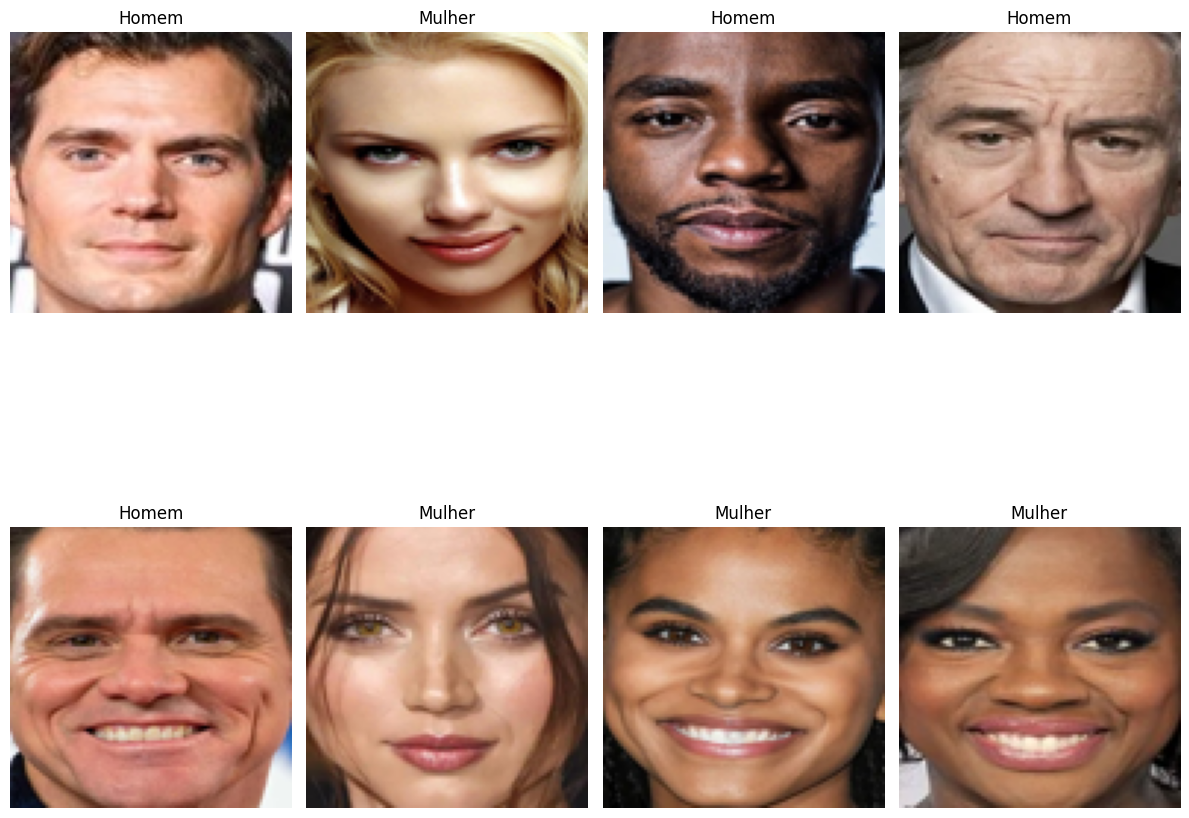

In [5]:
import os
from PIL import Image

# Preparar as listas
imagens_rgb = []     # para exibir
imagens_modelo = []  # para prever

# Ler, redimensionar e converter
for nome in os.listdir("./teste_modelo"):
    caminho = os.path.join("./teste_modelo", nome)

    # RGB para exibição
    img_rgb = Image.open(caminho).convert('RGB').resize((96, 96))
    imagens_rgb.append(np.array(img_rgb))

    # Grayscale para o modelo
    img_gray = img_rgb.convert('L')
    img_gray_np = np.expand_dims(img_gray, axis=-1)
    img_gray_np = np.expand_dims(img_gray_np, axis=0)
    imagens_modelo.append(img_gray_np)

# Empilhar imagens para batch
entrada_modelo = np.vstack(imagens_modelo)

# Fazer previsões
predicoes = modelo_genero.predict(entrada_modelo)
rotulos = ['Homem' if p < 0.5 else 'Mulher' for p in predicoes.flatten()]  # binary output

# Exibir com matplotlib
fig, axes = plt.subplots(2, 4, figsize=(12, 12))

for i, ax in enumerate(axes.flat):
    ax.imshow(imagens_rgb[i])  # em RGB
    ax.axis('off')
    ax.set_title(rotulos[i], fontsize=12)

plt.tight_layout()
plt.show()
